#Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with_mask= '/content/drive/MyDrive/Machine Learning/Modul 3/Kegiatan Kelompok/Dataset/with_mask'
without_mask = '/content/drive/MyDrive/Machine Learning/Modul 3/Kegiatan Kelompok/Dataset/without_mask'

In [ ]:
import os

In [ ]:
print("jumlah masker   :", len(os.listdir(with_mask)))
print("jumlah tanpa masker    :", len(os.listdir(without_mask)))

jumlah masker   : 2165
jumlah tanpa masker    : 1930


In [ ]:
!pip install split_folders
import splitfolders

In [ ]:
input_folder = '/content/drive/MyDrive/Machine Learning/Modul 3/Kegiatan Kelompok/Dataset'
output = '/content/drive/MyDrive/Machine Learning/Modul 3/Kegiatan Kelompok/Splited Dataset'
splitfolders.ratio(input_folder, output = output, seed=42, ratio=(.8, .19, .01))

Copying files: 4095 files [42:02,  1.62 files/s]


#Splitting Dataset

In [ ]:
train_dir = '/content/drive/MyDrive/Machine Learning/Modul 3/Kegiatan Kelompok/Splited Dataset/train'
val_dir = '/content/drive/MyDrive/Machine Learning/Modul 3/Kegiatan Kelompok/Splited Dataset/val'
test_dir = '/content/drive/MyDrive/Machine Learning/Modul 3/Kegiatan Kelompok/Splited Dataset/test'

In [ ]:
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [ ]:
batch_size = 20

#Augmentasi Data

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.5,
    fill_mode='constant',
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100,150),
    batch_size = batch_size,
    shuffle=True,
    color_mode="rgb",
    class_mode='categorical'
)

val_gen = train_datagen.flow_from_directory(
    val_dir,
    target_size=(100,150),
    batch_size = batch_size,
    color_mode="rgb",
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100,150),
    batch_size = batch_size,
    color_mode="rgb",
    class_mode='categorical'
)

Found 3273 images belonging to 2 classes.
Found 777 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


#Set Callback

In [ ]:
DESIRED_ACCURACY = 0.975

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('val_acc') is not None and logs.get('val_acc') >= DESIRED_ACCURACY) :
            print('\nReached 97,5% accuracy so cancelling training!')
            self.model.stop_training = True

callbacks = myCallback()

#Membuat Skema Model CNN

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flaten
    tf.keras.layers.Flatten(),
    #batch normalization
    tf.keras.layers.BatchNormalization(),
    #dropout
    tf.keras.layers.Dropout(0.5, input_shape=(2,)),
    #fully connected
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')                                 
])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 36, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 34, 16)        2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 17, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2720)             

#Melatih Model CNN

In [ ]:
train_step_size = train_gen.n//train_gen.batch_size
val_step_size = val_gen.n//val_gen.batch_size

print(train_step_size)
print(val_step_size)

163
38


In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [ ]:
history = model2.fit_generator(train_gen, steps_per_epoch=87, epochs=100, validation_data= val_gen, validation_steps=10, callbacks=callbacks, verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
87/87 - 30s - loss: 0.5592 - acc: 0.7724 - val_loss: 0.6360 - val_acc: 0.8100
Epoch 2/100


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


87/87 - 29s - loss: 0.3950 - acc: 0.8397 - val_loss: 0.6604 - val_acc: 0.5700
Epoch 3/100
87/87 - 28s - loss: 0.2597 - acc: 0.9002 - val_loss: 0.5587 - val_acc: 0.9100
Epoch 4/100
87/87 - 29s - loss: 0.2966 - acc: 0.8869 - val_loss: 0.5865 - val_acc: 0.8100
Epoch 5/100
87/87 - 29s - loss: 0.2686 - acc: 0.9115 - val_loss: 0.4203 - val_acc: 0.8600
Epoch 6/100
87/87 - 29s - loss: 0.2591 - acc: 0.9013 - val_loss: 0.3059 - val_acc: 0.8700
Epoch 7/100
87/87 - 29s - loss: 0.2542 - acc: 0.9140 - val_loss: 0.4025 - val_acc: 0.8400
Epoch 8/100
87/87 - 30s - loss: 0.2107 - acc: 0.9169 - val_loss: 1.1089 - val_acc: 0.7300
Epoch 9/100
87/87 - 30s - loss: 0.2190 - acc: 0.9195 - val_loss: 0.3228 - val_acc: 0.8750
Epoch 10/100
87/87 - 30s - loss: 0.2013 - acc: 0.9305 - val_loss: 0.5908 - val_acc: 0.7150
Epoch 11/100
87/87 - 29s - loss: 0.2134 - acc: 0.9190 - val_loss: 0.7089 - val_acc: 0.7700
Epoch 12/100
87/87 - 29s - loss: 0.2038 - acc: 0.9256 - val_loss: 0.1892 - val_acc: 0.9250
Epoch 13/100
87/87 

#Simpan Model dan History

In [ ]:
import json

target_dir = '/content/drive/MyDrive/Machine Learning/Modul 3/Kegiatan Kelompok/Model/Model 2'

# simpan history model pertama
history_dict = history.history
json.dump(history_dict, open(target_dir + '/history_model2.json', 'w'))

# simpan model pertama dan weight-nya
model2.save(target_dir + '/model2.h5')
model2.save_weights(target_dir + '/weight_model2.hdf5')

#Load History Model

In [ ]:
import json
target_dir = '/content/drive/MyDrive/Machine Learning/Modul 3/Kegiatan Kelompok/Model/Model 2'
history = json.load(open(target_dir + '/history_model2.json', 'r'))

#Evaluasi Model

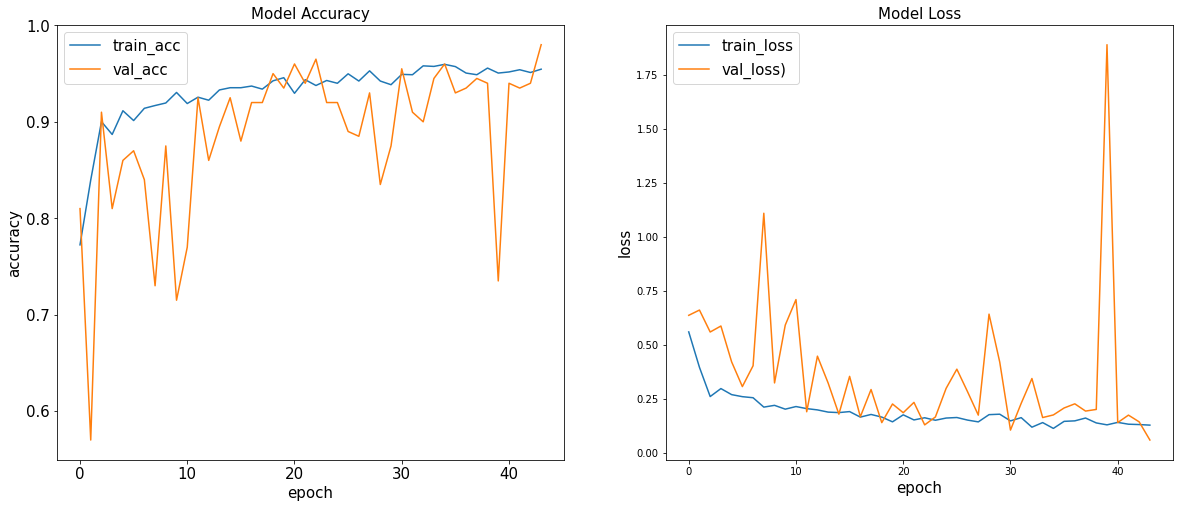

In [ ]:
plt.figure(figsize = (20,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.subplot(1, 2, 1) 
plt.plot(history['acc'],     label="train_acc")
plt.plot(history['val_acc'], label="val_acc")
plt.title('Model Accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
#plt.show()

#plt.figure(figsize = (10,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.subplot(1, 2, 2) 
plt.plot(history['loss'],    label="train_loss")
plt.plot(history['val_loss'], label="val_loss)")
plt.title('Model Loss', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

#Load Model

In [ ]:
from keras.models import load_model

# load model pertama
target_dir = '/content/drive/MyDrive/Machine Learning/Modul 3/Kegiatan Kelompok/Model/Model 2'
model_saved = load_model(target_dir + '/model2.h5')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100,150),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 42 images belonging to 2 classes.


#Evaluasi Model (Classsification Report)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
#Print Classification Report
#Print the Target names

target_names = []

for key in train_gen.class_indices:
    target_names.append(key)

Y_pred = model_saved.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

   with_mask       1.00      0.95      0.98        22
without_mask       0.95      1.00      0.98        20

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42



#Evaluasi Model (Matrix Confusion)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

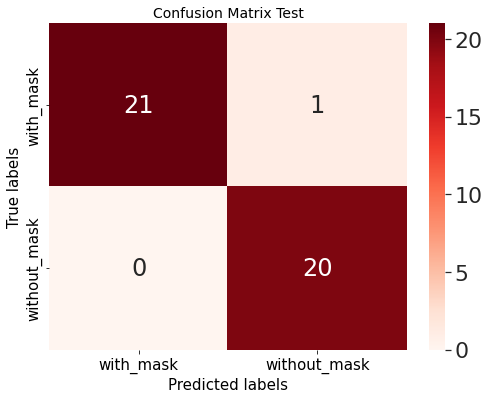

In [ ]:
from sklearn import metrics
Cmatrix_test = confusion_matrix(test_gen.classes, y_pred)
class_names = test_gen.class_indices

plt.figure(figsize = (8,6))
ax = plt.subplot()
sns.set(font_scale=2.0) # Adjust to fit
sns.heatmap(Cmatrix_test,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)

# labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font)
ax.set_ylabel('True labels', fontdict=label_font) 

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font)

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()